<a href="https://colab.research.google.com/github/ivn-srg/data-analysis-course-omsu/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%2011/%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80_11_%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical models to analyze and forecast time series dataset

# Intro

***В контексте цен на акции существует множество статистических моделей прогнозирования временных рядов:***

**1- Авторегрессия (AR)**

**2- Скользящее среднее (MA)**

**3- Авторегрессионное скользящее среднее (ARMA)**

**4- Авторегрессионное интегрированное скользящее среднее (ARIMA)**

**5- Сезонное авторегрессионное интегрированное скользящее среднее (SARIMA)**

**6- Сезонное авторегрессионное интегрированное скользящее среднее с экзогенными регрессорами (SARIMAX)**

***Чтобы определить, какой из них подходит для заданного набора данных, необходимо проверить тренд, сезонные компоненты и остаточные ошибки***

Популярной и широко используемой статистической моделью для прогнозирования временных рядов является модель авторегрессии-интегрированного скользящего среднего (ARIMA), которая представляет собой краеугольный камень прогнозирования временных рядов.

<img src="https://timeseriesreasoning.files.wordpress.com/2021/06/7d100-1mzkkvu_ih6qemb_mz83oaw.png" alt="изображение по центру" align="center" class="sc-hTnXLe UAvdY" width = '1500' height = '500'/>


** ARIMA** - это статистический метод, который приобрел огромную популярность благодаря своей эффективности при обработке различных стандартных временных структур, присутствующих в данных временных рядов. Он является обобщением более простого метода авторегрессии скользящего среднего и добавляет понятие интегрирования.

Каждый из этих компонентов явно указан в модели в качестве параметра. Для ARIMA используется стандартная запись (p,d,q), в которой параметры заменяются целыми значениями, чтобы быстро указать конкретную используемую модель ARIMA.

Параметры модели ARIMA определяются следующим образом:

**p**: порядок лага(прошлых значений), представляющий собой количество запаздывающих наблюдений, включённых в модель.

**d**: степень дифференцирования, обозначающая количество раз, которое необработанные наблюдения подвергаются дифференцированию.

**q**: порядок скользящего среднего, указывающий размер окна скользящего среднего.

***В этом блокноте модель ARIMA будет использоваться в первую очередь для проверки тренда, сезонных компонентов и остаточных ошибок в наборе данных***

## Авторегрессия (AR)

📌 Идея: будущее значение зависит от прошлых значений.

Пример: если ты хочешь предсказать цену на завтра — смотри, какая она была вчера, позавчера и т.д.

**Формула:**  
$$
X_t = c + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \varepsilon_t
$$

**Параметры:**  
p — количество лагов (прошлых значений), используемых в модели.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

data = pd.Series([10, 12, 13, 12, 15, 16, 17, 18])
model = AutoReg(data, lags=1).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания AR(1):", predictions.values)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(data[1:], predictions))
print("RMSE AR-модели:", rmse)

Предсказания AR(1): [11.67045455 13.375      14.22727273 13.375      15.93181818 16.78409091
 17.63636364]
RMSE AR-модели: 1.0713203408538796


## Скользящее среднее (MA)

📌 Идея: будущее значение зависит от ошибок (шумов), сделанных в прошлом.

Пример: если модель вчера ошиблась на +10, она может и завтра также ошибиться — это можно учесть.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

data = pd.Series([5, 6, 5, 7, 8, 7, 9, 10])
model = ARIMA(data, order=(0, 0, 1)).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания MA(1):", predictions.values)

rmse = mean_squared_error(data[1:], predictions)
print("RMSE MA-модели:", rmse)

Предсказания MA(1): [6.02501369 7.03335153 5.52501376 8.23001623 6.85834715 7.17144404
 8.6500136 ]
RMSE MA-модели: 1.6499688191434427


## Авторегрессионное скользящее среднее (ARMA) AR + MA

📌 Идея: объединяем прошлые значения и прошлые ошибки.

🔸 Когда использовать: когда оба фактора (и значения, и ошибки) влияют на будущее.

❗ Требование: ряд должен быть стационарным (среднее и дисперсия постоянны).
**Формула:**

$$X_t = c + \phi_1 X_{t-1} + \dots + \phi_p X_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}$$

**Параметры:**
- p — порядок AR,
- q — порядок MA.

In [ ]:
data = pd.Series([2, 3, 2, 5, 4, 5, 5, 4, 6, 5])
model = ARIMA(data, order=(1, 0, 1)).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания ARMA(1,1):", predictions.values)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(data[1:], predictions)
print("MAE ARMA-модели:", mae)


Предсказания ARMA(1,1): [3.04804425 3.25807778 2.95793293 3.98098035 3.98970616 4.37092919
 4.5152033  4.19188946 4.82535859]
MAE ARMA-модели: 0.8338365177114136


## Авторегрессионное интегрированное скользящее среднее (ARIMA)
По сути: ARMA + дифференцирование

📌 Идея: если ряд нестабильный (растёт, колеблется), делаем его стационарным, взяв разности.

**Формула:**

$$\nabla^d X_t = X_t - X_{t-d}$$

где после разностей применяется ARMA-модель:

$$\nabla^d X_t = c + \sum_{i=1}^p \phi_i \nabla^d X_{t-i} + \sum_{j=1}^q \theta_j \varepsilon_{t-j} + \varepsilon_t$$

**Параметры:**
- p — лаги в AR
- d — число дифференцирований
- q — лаги ошибок (MA)

In [ ]:
import numpy as np

data = pd.Series([50, 52, 55, 60, 62, 65, 70, 72, 75, 80])
model = ARIMA(data, order=(1, 1, 1)).fit()
predictions = model.predict(start=1, end=len(data)-1)
print("Предсказания ARIMA(1,1,1):", predictions.values)

rmse = mean_squared_error(data[1:], predictions)
print("RMSE ARIMA-модели:", rmse)

Предсказания ARIMA(1,1,1): [50.00054646 53.72409742 57.31477645 63.16454714 64.88457584 67.90694167
 73.24680693 75.07259747 78.06368871]
RMSE ARIMA-модели: 2.655072515708036


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Сезонное авторегрессионное интегрированное скользящее среднее (SARIMA)

По сути: SARIMA = ARIMA + сезонность

📌 Идея: добавляем сезонные лаги, чтобы учитывать повторяющиеся шаблоны (например, каждый декабрь — рост продаж).

Формат: SARIMA(p,d,q)(P,D,Q,s)

(
𝑝
,
𝑑
,
𝑞
)
(p,d,q) — обычные параметры

(
𝑃
,
𝐷
,
𝑄
,
𝑠
)
(P,D,Q,s) — сезонные параметры

𝑠
 — длина сезона (например, 12 для месяцев)

🔸 Когда использовать: если есть сезонные колебания.

**Пример:**  
Если продажи имеют годовую сезонность (например, по месяцам), используем SARIMA с s=12

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.Series([120, 130, 140, 150, 160, 155, 150, 145, 150, 160, 170, 180,
                  130, 140, 150, 160, 170, 165, 160, 155, 160, 170, 180, 190])
model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
predictions = model.predict(start=12, end=23)
print("Предсказания SARIMA:", predictions.values)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Предсказания SARIMA: [240. 140. 150. 160. 170. 165. 160. 155. 160. 170. 180. 190.]


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Сезонное авторегрессионное интегрированное скользящее среднее с экзогенными регрессорами (SARIMAX)

**Описание:**  
SARIMAX — расширение SARIMA, которое учитывает **внешние регрессоры (exogenous variables)**. Это может быть, например, реклама, курс валют, температура и пр., влияющие на прогнозируемый ряд.

**Формула:**

$$Y_t = ARIMA(p, d, q) \times (P, D, Q, s) + \beta X_t + \varepsilon_t$$

где X_t — внешние переменные.

**Параметры:**

- ARIMA: (p,d,q)(p, d, q)
    
- Сезонность: (P,D,Q,s)(P, D, Q, s)
    
- `exog`: внешний регрессор (временной ряд той же длины)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Генерация данных
np.random.seed(42)
n = 60  # 5 лет по месяцам
time_index = pd.date_range(start='2018-01-01', periods=n, freq='M')

# Целевая переменная: продажи с трендом и сезонностью
seasonal_pattern = np.tile([10, 12, 15, 18, 20, 22, 25, 30, 28, 24, 18, 12], 5)
trend = np.linspace(50, 100, n)
noise = np.random.normal(0, 2, n)
sales = trend + seasonal_pattern + noise

# Внешний фактор: реклама (exogenous regressor)
ads = 5 + 0.2 * np.arange(n) + np.random.normal(0, 0.5, n)

# DataFrame
df = pd.DataFrame({
    "sales": sales,
    "ads": ads
}, index=time_index)

# Обучение модели SARIMAX
model = SARIMAX(df['sales'], exog=df[['ads']], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# Прогноз
forecast = results.predict(start=48, end=59, exog=df[['ads']].iloc[48:60])
print("Прогноз SARIMAX:\n", forecast)

# Метрика
true_values = df['sales'].iloc[48:60]
rmse = mean_squared_error(true_values, forecast)
print("RMSE SARIMAX:", round(rmse, 2))


<ipython-input-14-14f91412fbc4>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start='2018-01-01', periods=n, freq='M')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Прогноз SARIMAX:
 2022-01-31    100.217106
2022-02-28    101.225629
2022-03-31    105.106145
2022-04-30    111.856356
2022-05-31    113.289299
2022-06-30    116.542062
2022-07-31    120.581629
2022-08-31    127.236157
2022-09-30    125.601343
2022-10-31    121.780593
2022-11-30    117.268009
2022-12-31    111.186201
Freq: ME, Name: predicted_mean, dtype: float64
RMSE SARIMAX: 2.83


# Работа реальными данными

# Import Modules

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Dataset Description

**Набор данных содержит ежедневные данные по акциям Tesla (TESLA) со столбцами, включающими дату, цену открытия, максимальную цену, минимальную цену, цену закрытия, скорректированную цену закрытия и объём**

**Чтобы спрогнозировать среднемесячную цену закрытия на следующие шесть месяцев, выполним следующие шаги:**

* 1 Прочитаем данные, проанализировав дату и время.

* 2 Пересчитаем данные, чтобы вычислить среднемесячную цену закрытия по столбцу «Close».

* 3 Выполним анализ временных рядов на основе данных, усреднённых поквартально, с помощью ARIMA.

* 4 Проведем прогноз на следующие четыре квартала (через год) на основе усреднённых данных поквартально.

**Начнём с преобразования столбца «Дата» в формат даты и времени и вычисления среднего значения столбца «Цена закрытия» за месяц.

## 1. Create Dataframe, parsing datetime and set it as index

In [ ]:
data = 'TSLA.csv'
df = pd.read_csv(data, parse_dates = True, index_col = "Date")

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...
2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500


## 2. Compute Quarterly Average Analysis

In [ ]:
# Resample the data to compute quarterly average of the 'Close' column
Quarterly_avg = df['Close'].resample('Q').mean()

Quarterly_avg.tail()

,Close
Date,
2021-03-31,753.185899
2021-06-30,651.258255
2021-09-30,706.096559
2021-12-31,1006.169060
2022-03-31,922.092452


####       Lets Visualize

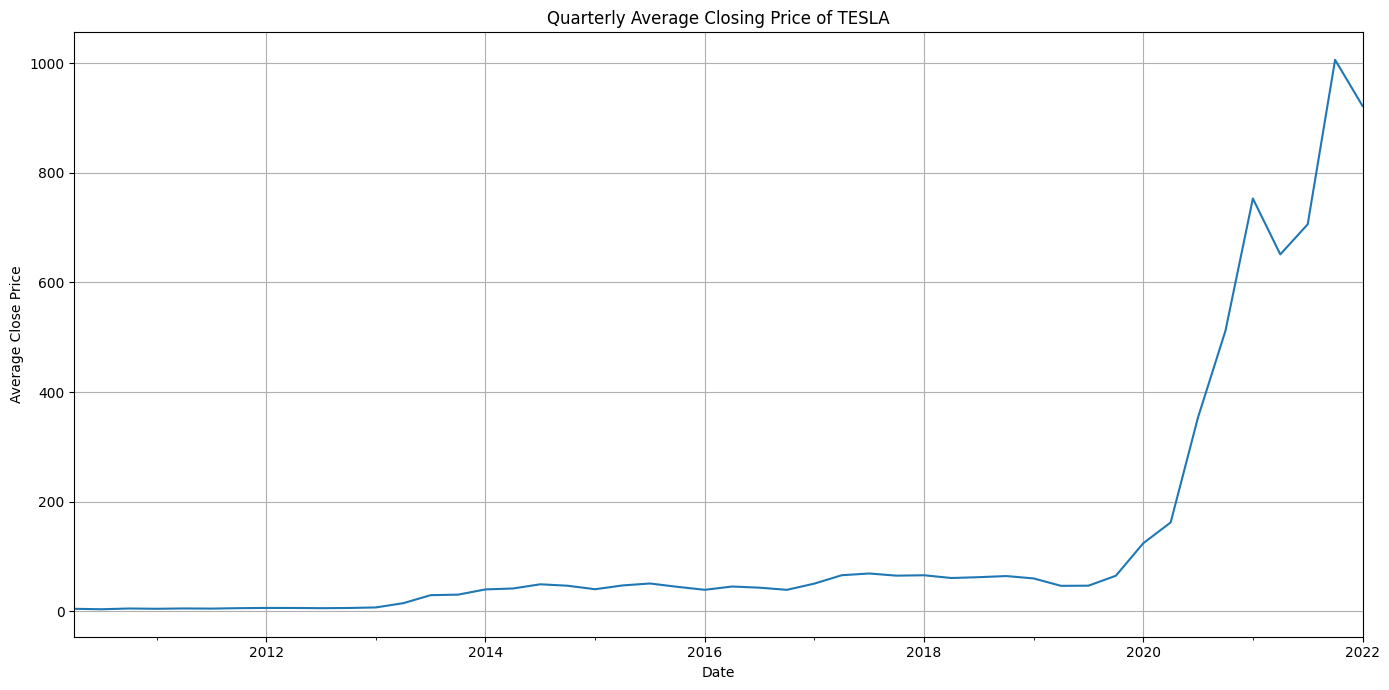

In [ ]:
# Plot the monthly average closing prices
plt.figure(figsize=(14, 7))
Quarterly_avg.plot(title='Quarterly Average Closing Price of TESLA')
plt.ylabel('Average Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
f"{adfuller(Quarterly_avg, autolag='AIC')[1]:2f}"

'0.997967'

<Axes: xlabel='Date'>

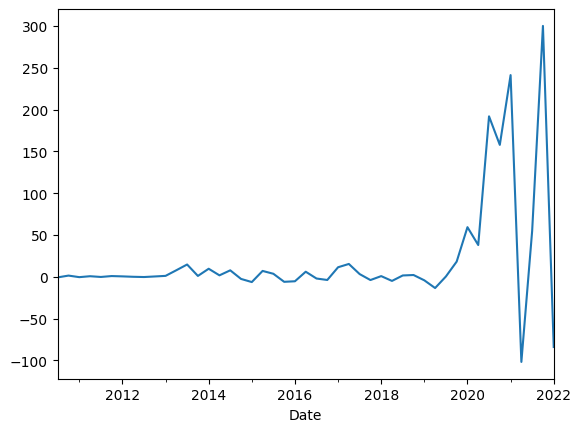

In [ ]:
Quarterly_avg.diff().dropna().plot()

In [ ]:
f"{adfuller(Quarterly_avg.diff().dropna(), autolag='AIC')[1]:2f}"

'0.000005'

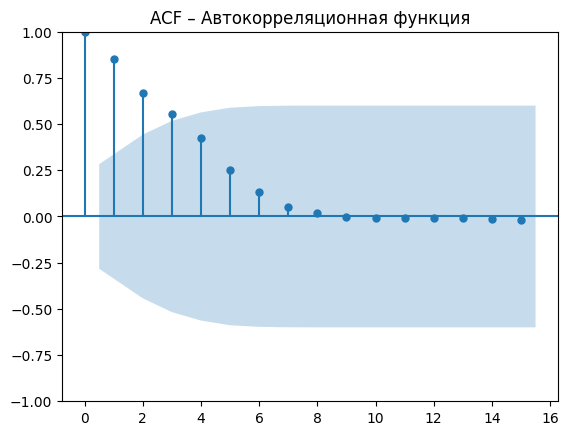

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Построение коррелограммы ACF (автокорреляции)
plot_acf(Quarterly_avg, lags=15)
plt.title('ACF – Автокорреляционная функция')
plt.show()

# Построение частичной автокорреляции (PACF)
# plot_pacf(Quarterly_avg, lags=15, method='ywm')  # 'ywm' — устойчивый метод
# plt.title('PACF – Частичная автокорреляция')
# plt.show()

**As seen above:**

-->***Курс акций демонстрирует значительный рост с некоторыми колебаниями.***


## 3. ARIMA model

### ---> Define best order (p, d, q)

In [ ]:
# Function to perform the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    return result[1] <= 0.05

# Check if the data is stationary
is_stationary = adf_test(Quarterly_avg)

# If not stationary, difference the data
if not is_stationary:
    differenced = Quarterly_avg.diff().dropna()
    is_differenced_stationary = adf_test(differenced)
else:
    is_differenced_stationary = False

# Grid search for ARIMA parameters
p_values = range(0, 5)
d_values = [1] if is_differenced_stationary else [0, 1]
q_values = range(0, 5)
best_aic = float('inf')
best_order = None

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                model = ARIMA(Quarterly_avg, order=order)
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
            except:
                continue

best_order

(3, 1, 0)

### ---> Fitting data into model

In [ ]:
#### Fit the ARIMA model with the best order
model = ARIMA(Quarterly_avg, order=best_order)
model_fit = model.fit()

model_fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   48
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -260.432
Date:                Thu, 08 May 2025   AIC                            528.863
Time:                        17:52:09   BIC                            536.264
Sample:                    06-30-2010   HQIC                           531.648
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1165      0.165      0.705      0.481      -0.207       0.440
ar.L2         -0.0793      0.150     -0.529      0.597      -0.373       0.215
ar.L3          0.5948      0.117      5.069      0.000       0.365       0.825
sigma2      3700.7253    373.199      9.916      0.000    2969.269    4432.181
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):               114.10
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):             484.07   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 4. Forcasting the next 4 Quarters [YEAR LATER]

In [ ]:
# Forecast the next four Quarters
forecast = model_fit.forecast(steps=4)

forecast

,predicted_mean
2022-06-30,921.131429
2022-09-30,1106.171801
2022-12-31,1077.787897
2023-03-31,1059.241741


### ---> Lets Visualise

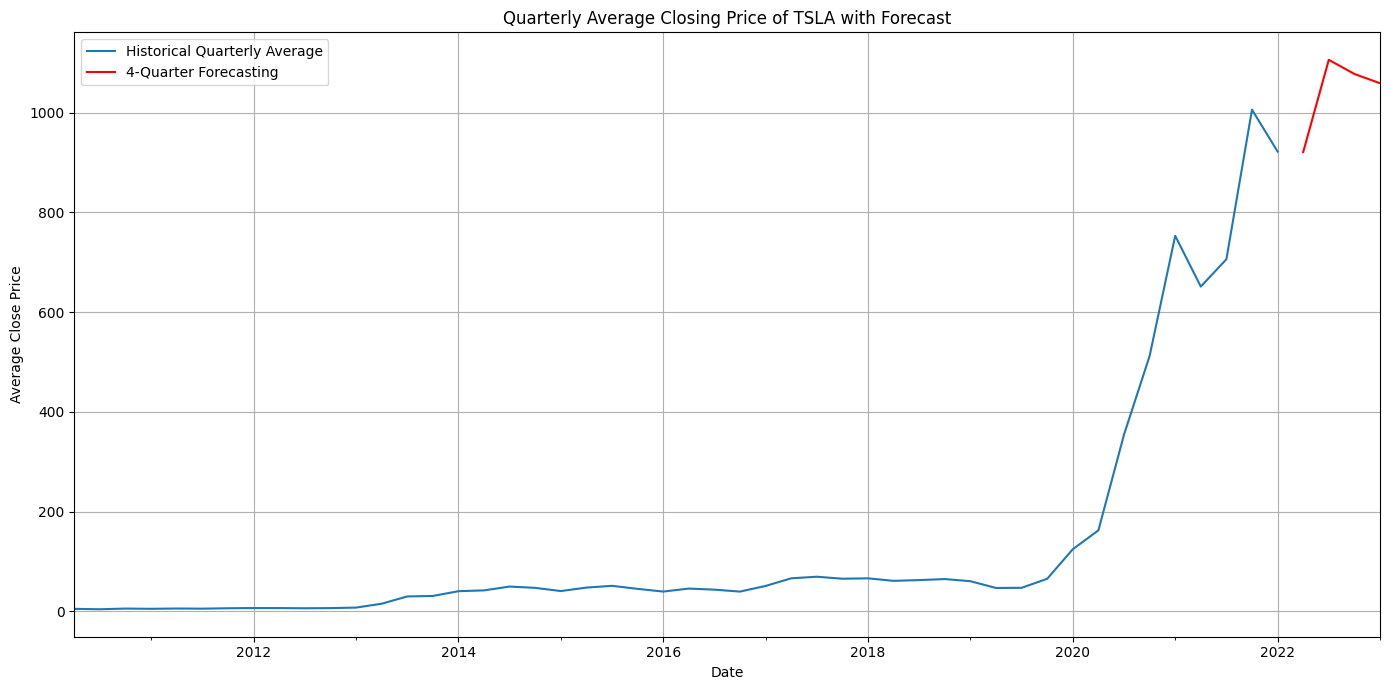

In [ ]:
# Plot historical and forecasted data
plt.figure(figsize=(14, 7))
Quarterly_avg.plot(label='Historical Quarterly Average', legend=True)
forecast.plot(label='4-Quarter Forecasting', color='red', legend=True)
plt.title('Quarterly Average Closing Price of TSLA with Forecast')
plt.ylabel('Average Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

## Finally, lets Check Trend, seasonal components and residual errors

### --->Lets visualize

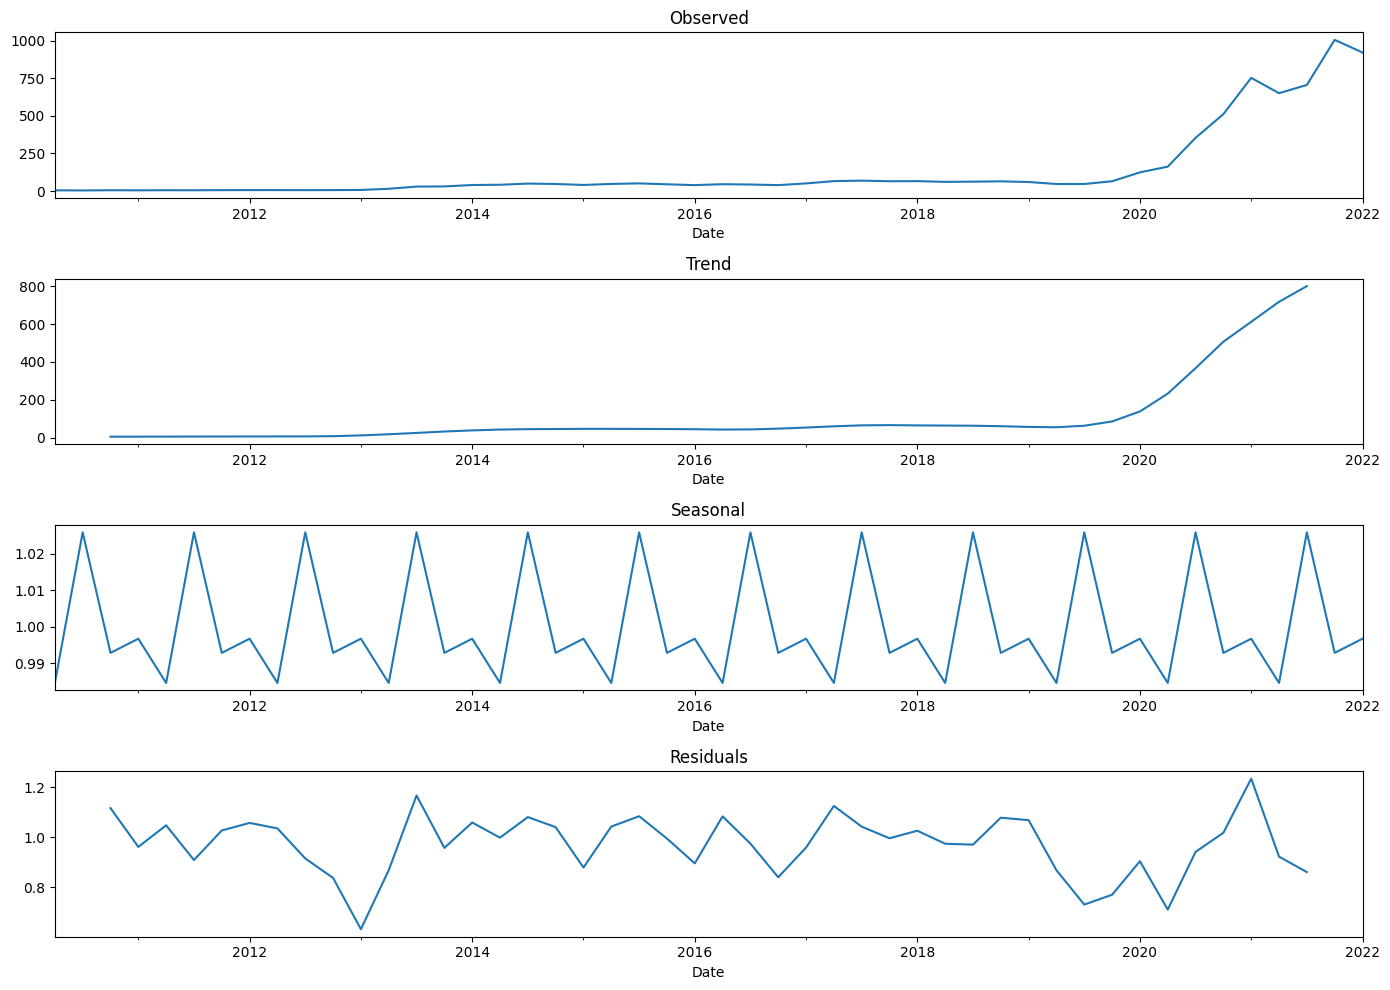

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the daily closing prices using the correct parameter
decomposition = seasonal_decompose(Quarterly_avg, model='multiplicative', period=4)  # Using Quarterly frequency

# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residuals')

plt.tight_layout()
plt.show()

**Разложение среднемесячных цен закрытия акций TESLA по кварталам показывает следующее:**

* Компонент тренда демонстрирует общее движение вверх на протяжении многих лет, что указывает на общий рост цен на акции.

* Сезонный компонент выглядит относительно одинаково на протяжении долгого времени и близок к 1,04, это означает, что среднемесячные цены закрытия акций TESLA имеют одинаковую сезонную структуру в годовом цикле.

  --> Это типично для данных по акциям, которые часто не имеют ярко выраженной сезонности, как другие данные временных рядов (например, данные о ежемесячных продажах).

* Остатки представляют собой то, что осталось после учёта тренда и сезонных эффектов, которые в идеале должны быть случайным шумом.

* На этом графике остатки представляют собой различные закономерности, особенно в последние 5 кварталов, что может указывать на то, что можно извлечь больше информации, возможно, с помощью более сложных моделей или преобразований.

  --> Отсутствие ярко выраженной сезонной зависимости может быть связано с характером фондового рынка, на который влияет множество непредсказуемых факторов, не подчиняющихся строгому сезонному циклу.
  
  --> Однако другие факторы, такие как ежемесячные финансовые отчёты, выпуск новых продуктов и макроэкономические события, могут создавать циклические закономерности, которые не имеют фиксированной частоты и поэтому не учитываются в традиционных сезонных разложениях.

  --> Остаточные значения, которые в идеале не должны содержать закономерностей, **можно дополнительно проанализировать**, чтобы убедиться, что они напоминают белый шум, что подтвердит адекватность разложения.
  